In [1]:
import os, glob
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from imp import reload

from noise_correlations.data import datasets
from noise_correlations import discriminability, null_models
from noise_correlations.discriminability import lfi_data, lda_data, corrected_lfi_data
from noise_correlations.null_models import random_rotation_data, shuffle_data
from noise_correlations import plot

In [9]:
# data paths
folder = 'kohn_pvc-11/'
reload(datasets)
ds = datasets.KohnCRCNSpvc11_monkey(folder)
Yp = ds.data_tensor()
trial_median = np.median(Yp, axis=-1)
keep = np.logical_and(trial_median.max(axis=-1) >= 15,
                      trial_median.max(axis=-1) >= 2.0 * trial_median.min(axis=-1))
Yp = Yp[keep]
bas = np.median(Yp, axis=-1).argmax(axis=1)
idxs = np.argsort(bas)
Yp = Yp[idxs]
bas = bas[idxs]
n_neurons, n_stimuli, n_trials = Yp.shape
print(n_neurons)

20


In [8]:
bas

array([ 1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  3,  4,  4,  5,  8, 10, 10,
       10, 10, 11])

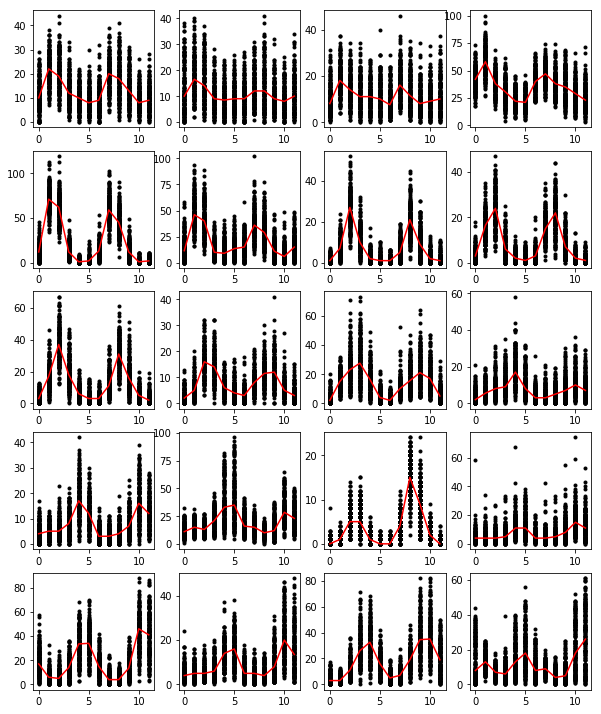

In [9]:
fig, axes = plt.subplots(Yp.shape[0]//4, 4, figsize=(10, 12.5))
for ax_idx, ax in enumerate(axes.ravel()):
    counts = Yp[ax_idx]
    angles = np.tile(np.arange(n_stimuli)[:, np.newaxis], (1, Yp.shape[-1]))
    ax.scatter(angles, counts, marker='.', color='k')
    ax.plot(np.median(angles, axis=1), np.median(counts, axis=1), color='r')

In [10]:
delta_as = 2
delta_ns = 2
n_boot = 100


n_pts = 0
for ii in range(n_neurons):
    for d in range(delta_ns):
        n0 = ii
        n1 = (ii + d + 1) % n_neurons
        mina = bas[n0] - delta_as
        maxa = bas[n1] + delta_as + 1
        if maxa < mina:
            maxa += n_stimuli
        n_pts += maxa - mina
print(n_pts)

ps = np.full((2, 2, n_pts), np.nan)
idx = 0
for ii in range(n_neurons):
    print(float(idx) / n_pts)
    for d in range(delta_ns):
        n0 = ii
        n1 = (ii + d + 1) % n_neurons
        mina = bas[n0] - delta_as
        maxa = bas[n1] + delta_as + 1
        if maxa < mina:
            maxa += n_stimuli
        for a in range(mina, maxa):
            a0 = a % n_stimuli
            a1 = (a + 1) % n_stimuli
            x = Yp[[n0, n1]][:, a0].T
            y = Yp[[n0, n1]][:, a1].T
            val_s, values_s, ps_s = null_models.eval_null_data(x, y, shuffle_data,
                                                               [lfi_data, lda_data], n_boot)
            val_r, values_r, ps_r = null_models.eval_null_data(x, y, random_rotation_data,
                                                               [lfi_data, lda_data], n_boot, same_null=True)
            ps[0, :, idx] = ps_s
            ps[1, :, idx] = ps_r
            idx += 1

236
0.0
0.0423728813559322
0.0847457627118644
0.1271186440677966
0.1694915254237288
0.21610169491525424
0.2669491525423729
0.3093220338983051
0.3516949152542373
0.3983050847457627
0.4533898305084746
0.5042372881355932
0.5508474576271186
0.614406779661017
0.690677966101695
0.75
0.7923728813559322
0.8347457627118644
0.8813559322033898
0.940677966101695


In [ ]:
np.savez('ps_kohn_pvc-11', ps=ps)

Bbox(x0=0.125, y0=0.125, x1=0.47727272727272724, y1=0.88)
Bbox(x0=0.5477272727272726, y0=0.125, x1=0.8999999999999999, y1=0.88)
sig shuffle:  0.3898305084745763
sig rotate:  0.00847457627118644
only sig shuffle:  0.3813559322033898
only sig rotate:  0.0
sig both:  0.00847457627118644

sig shuffle:  0.2542372881355932
sig rotate:  0.0
only sig shuffle:  0.2542372881355932
only sig rotate:  0.0
sig both:  0.0



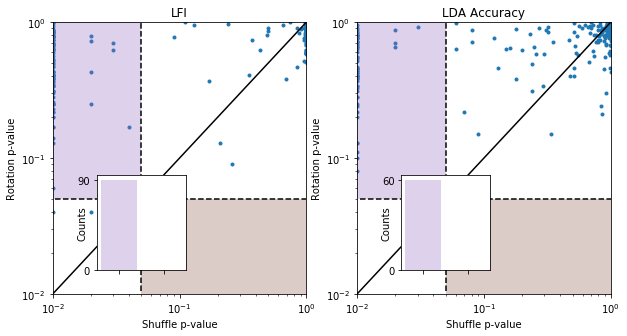

In [11]:
reload(plot)
faxes = plt.subplots(1, 2, figsize=(10, 5))
f, (ax0, ax1) = faxes
plot.plot_pvalue_comparison(ps[0, 0].ravel(), ps[1, 0].ravel(),
                       labels=['Shuffle p-value', 'Rotation p-value'], faxes=(f, ax0))
plot.plot_pvalue_comparison(ps[0, 1].ravel(), ps[1, 1].ravel(),
                       labels=['Shuffle p-value', 'Rotation p-value'], faxes=(f, ax1))
ax0.set_title('LFI')
ax1.set_title('LDA Accuracy')
#plt.savefig('/home/jesse/Downloads/blanche_ps.pdf')

for ii in range(2):
    print('sig shuffle: ', (ps[0, ii] <= .05).sum() / ps[0, ii].size)
    print('sig rotate: ', (ps[1, ii] <= .05).sum() / ps[1, ii].size)
    print('only sig shuffle: ', (np.logical_and(ps[0, ii] <= .05, ps[1, ii] > .05)).sum() / ps[0, ii].size)
    print('only sig rotate: ', (np.logical_and(ps[1, ii] <= .05, ps[0, ii] > .05)).sum() / ps[0, ii].size)
    print('sig both: ', (np.logical_and(ps[0, ii] <= .05, ps[1, ii] <= .05)).sum() / ps[0, ii].size)
    print()

In [16]:
rng = np.random.RandomState()
rng2 = np.random.RandomState()

In [21]:
rng2.__getstate__()

('MT19937', array([3809186812, 2838558193, 2769110244, 2491581067, 1313304883,
        2377347101, 2289974584, 2528777346, 2511747472,  975140605,
        2259066381, 2857160956, 2147950452,  639341120, 1734617571,
        2241136046, 4122356381,  675903268,  690379286, 4020991650,
        3817455304, 3403020850, 1235679241, 1305490348, 4048749651,
        1716201270,  276036595, 4220368557, 3785640137, 2781079999,
        1622797940,  674052604,  257285258, 1252308597, 4164448623,
        1208962288,  139077490, 4034032413, 3139115223, 3912774397,
         838434450, 1193569499, 2852494248,  172667892, 2247293986,
        4043001485, 4140094574, 4024491802,  132919135,  296651823,
         457479387, 1075964647,  845420053,   89802745, 4145226914,
        1091019629, 2526341461, 1291205463, 3223583237, 1372827919,
         928203855, 1484383769, 3788618202, 3125389325, 2038979330,
         140570429,  514338836, 1687176776,  395616125, 4053524757,
        4083094984, 3751583689, 36572

In [23]:
print(rng.randint(1000), rng2.randint(1000))

699 699


In [22]:
rng2.set_state(rng.__getstate__())

In [ ]:
rng2 = rng.seed